In [62]:
## Importing the data from tarfile

import tarfile
tar = tarfile.open("train.tar")
tar.extractall()
# tar.close()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image
import os
from os import listdir
from PIL import Image
import pandas as pd

In [2]:
## Importing the csv file

train = pd.read_csv('train.csv', header = None)
data_list = train.values.tolist()
print(len(data_list))

12993


(31, 22, 3)
RGB


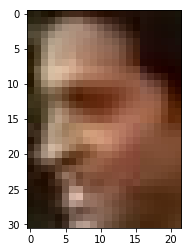

In [3]:
img = Image.open('train_image/12988.jpg')
plt.imshow(np.asarray(img),cmap ='gray') #show image inline
print(np.asarray(img).shape)
print(img.mode)

In [4]:
## Modified train_image and saved it in a new folder

import errno
import shutil
 
def copy(src, dest):
    try:
        shutil.copytree(src, dest)
    except OSError as e:
        # If the error was caused because the source wasn't a directory
        if e.errno == errno.ENOTDIR:
            shutil.copy(src, dest)
        else:
            print('Directory not copied. Error: %s' % e)
            
copy('train_image','train_image_mod')

In [5]:
## Printing the name of corrupt files

for filename in listdir('train_image_mod/'):
    if filename.endswith('.jpg'):
        try:
            img = Image.open('train_image_mod/'+filename) # open the image file
            img.verify() # verify that it is, in fact an image
        except (IOError, SyntaxError) as e:
            print('Bad file:', filename) # print out the names of corrupt files
            sep = '.'
            rest = filename.split(sep,1)[0]
            rest = int(rest) - 1
            del data_list[rest]
            os.remove('train_image_mod/'+filename)



Bad file: 12398.jpg


In [6]:
print(len(data_list))

12992


In [7]:
# checking for corrput files 

img = Image.open('train_image_mod/12398.jpg')
plt.imshow(np.asarray(img),cmap ='gray') #show image inline


FileNotFoundError: [Errno 2] No such file or directory: 'train_image_mod/12398.jpg'

In [8]:
## deleting corrupt files 

for filename in listdir('train_image_mod/'):
    img = Image.open('train_image_mod/'+filename)
    if np.asarray(img).shape != (350,350):
        img = img.resize((350,350))
    if img.mode != 'L':
        img = img.convert(mode = 'L')
        sep = '.'
        rest = filename.split(sep, 1)[0]
        img.save('train_image_mod/' + filename, format = 'JPEG')

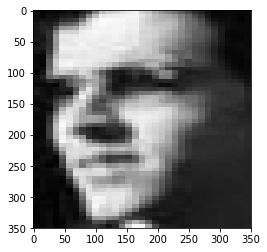

In [9]:
## Displaying non-corrupt images

img = Image.open('train_image_mod/00018.jpg')
plt.imshow(np.asarray(img),cmap ='gray') #show image inline

(82, 47, 3)
RGB


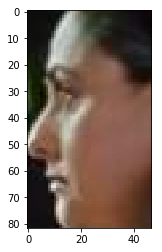

In [57]:
## Example of Color image and different dimension 

img = Image.open('train_image/00001.jpg')
plt.imshow(np.asarray(img)) #show image inline
print(np.asarray(img).shape)
print(img.mode)

In [10]:
## Resizing all the images to (350x350) dimension and converting them to grayscale image

for filename in listdir('train_image_mod/'):
    img = Image.open('train_image_mod/'+filename)
    if np.asarray(img).shape != (350,350):
        print('Resize file :', filename )
    if img.mode != 'L':
        print('Img mode L : ', filename)

(350, 350, 3)


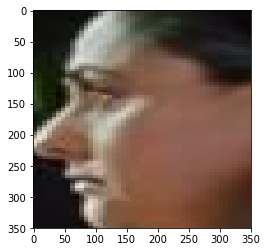

In [58]:
## Resizing the image 

img = img.resize((350,350))
plt.imshow(np.asarray(img), cmap='gray')
print(np.asarray(img).shape)

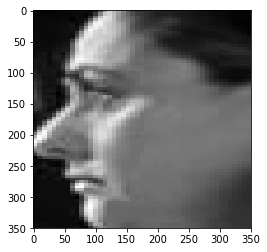

In [59]:
## Converting the image into grayscale

img = img.convert(mode = 'L')
plt.imshow(np.asarray(img),cmap ='gray') #show image inline



In [11]:
## Transforming the images (Fliping, rotating, transposing)

for filename in listdir('train_image_mod/'):    
    img = Image.open('train_image_mod/' + filename)
    sep = '.'
    rest = filename.split(sep, 1)[0]
    rest_int = int(rest)-1
    
    img_fliplr = img.transpose(Image.FLIP_LEFT_RIGHT)
    rest_mod1 = rest + '_left_right.jpg'
    img.save('train_image_mod/' + rest_mod1, format = 'JPEG')
    data_list.append([rest_mod1,data_list[rest_int][1]])    

#     img_fliptb = img.transpose(Image.FLIP_TOP_BOTTOM)
#     rest_mod2 = rest + '_top_bottom.jpg'
#     img.save('train_image_mod/' + rest_mod2, format = 'JPEG')
#     data_list.append([rest_mod2,data_list[rest_int][1]])

    img_trans = img.transpose(Image.TRANSPOSE)
    rest_mod3 = rest + '_transpose.jpg'
    img.save('train_image_mod/' + rest_mod3, format = 'JPEG')
    data_list.append([rest_mod3,data_list[rest_int][1]])

#     img_rot = img.rotate(270)
#     rest_mod4 = rest + '_rotate.jpg'
#     img.save('train_image_mod/' + rest_mod4, format = 'JPEG')
#     data_list.append([rest_mod4,data_list[rest_int][1]])

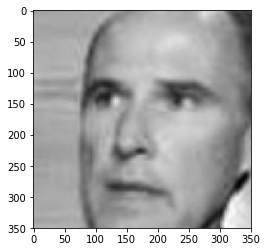

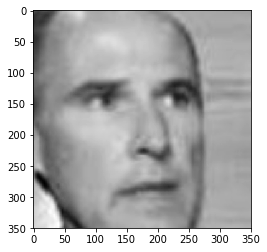

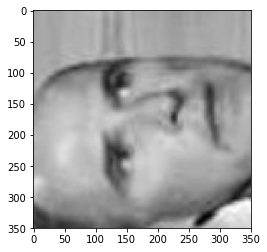

In [7]:
## Displaying the transformed image

img = Image.open('train_image_mod/' + '00014.jpg')
plt.imshow(np.asarray(img), cmap='gray')
plt.show()

img_fliplr = img.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(np.asarray(img_fliplr), cmap='gray')
plt.show()

# img_fliptb = img.transpose(Image.FLIP_TOP_BOTTOM)
# plt.imshow(np.asarray(img_fliptb), cmap='gray')
# plt.show()

img_trans = img.transpose(Image.TRANSPOSE)
plt.imshow(np.asarray(img_trans), cmap='gray')
plt.show()

# img_rot = img.rotate(270)
# plt.imshow(np.asarray(img_rot), cmap='gray')
# plt.show()

In [13]:
## Saving the scaled and transformed images in a csv file

import csv
with open('train_mod.csv', 'w') as writefile:
    wr = csv.writer(writefile)
    wr.writerows(data_list)

writefile.close()

In [4]:
data = pd.read_csv('train_mod.csv', header = None)
ydata = data.values.tolist()

print(len(ydata))

38976


In [18]:
## Shuffling and splitting the data

import random
random.shuffle(ydata)

ytrain = ydata[:30000]
ytest = ydata[30000:len(ydata)]

print(len(ytrain))
print(len(ytest))

<class 'list'>
30000
8976


In [23]:
import csv
with open('ytrain.csv', 'w') as writefile:
    wr = csv.writer(writefile)
    wr.writerows(ytrain)

writefile.close()

In [24]:
import csv
with open('ytest.csv', 'w') as writefile:
    wr = csv.writer(writefile)
    wr.writerows(ytest)

writefile.close()

In [4]:
y1 = pd.read_csv('ytrain.csv',header = None)
ytrain = y1.values.tolist()

In [5]:
y2 = pd.read_csv('ytest.csv',header = None)
ytest = y2.values.tolist()

In [ ]:
xtrain = np.zeros((len(ytrain),350,350,1),dtype = np.uint8)

for i in range(0,len(ytrain)):
    filename = ytrain[i][0]
    img = mpimg.imread('train_image_mod/' + filename)
    img = img.reshape(350,350,1)
    xtrain[i] = img
    

In [ ]:
# np.save('train_image_xtrain',xtrain)
np.save('xtrain_mod_1',xtrain)

In [6]:
xtest = np.zeros((len(ytest),350,350,1),dtype = np.uint8)

for i in range(0,len(ytest)):
    filename = ytest[i][0]
    img = mpimg.imread('train_image_mod/' + filename)
    img = img.reshape(350,350,1)
    xtest[i] = img

In [ ]:
# np.save('train_image_xtest',xtest)
np.save('xtest_mod_1',xtest)